<a href="https://colab.research.google.com/github/SachinSharma-2003/Oil_Spill_Detection-/blob/main/ProjectEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import os

os.makedirs("dataset/images/train", exist_ok=True)
os.makedirs("dataset/images/val", exist_ok=True)
os.makedirs("dataset/masks/train", exist_ok=True)
os.makedirs("dataset/masks/val", exist_ok=True)

print("Folders created successfully")

Folders created successfully


In [155]:
import os

print(os.listdir('.'))


['.config', 'processed', 'dataset', 'drive', 'sample_data']


In [156]:
import os
for f in os.listdir('.'):
    print(f, os.path.getsize(f))


.config 4096
processed 4096
dataset 4096
drive 4096
sample_data 4096


In [157]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/images.zip", "r") as z:
    z.extractall("/content/dataset")

with zipfile.ZipFile("/content/drive/MyDrive/masks.zip", "r") as z:
    z.extractall("/content/dataset")


In [159]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(root, "->", len(files), "files")


/content/dataset -> 0 files
/content/dataset/masks -> 1 files
/content/dataset/masks/val -> 1615 files
/content/dataset/masks/train -> 6455 files
/content/dataset/images -> 1 files
/content/dataset/images/val -> 1615 files
/content/dataset/images/train -> 6455 files
/content/dataset/__MACOSX -> 2 files
/content/dataset/__MACOSX/masks -> 3 files
/content/dataset/__MACOSX/masks/val -> 1615 files
/content/dataset/__MACOSX/masks/train -> 6455 files
/content/dataset/__MACOSX/images -> 3 files
/content/dataset/__MACOSX/images/val -> 1615 files
/content/dataset/__MACOSX/images/train -> 6455 files


In [160]:
import shutil

shutil.rmtree("/content/dataset/__MACOSX", ignore_errors=True)

print("Removed __MACOSX folder successfully!")


Removed __MACOSX folder successfully!


In [161]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(root, "->", len(files), "files")


/content/dataset -> 0 files
/content/dataset/masks -> 1 files
/content/dataset/masks/val -> 1615 files
/content/dataset/masks/train -> 6455 files
/content/dataset/images -> 1 files
/content/dataset/images/val -> 1615 files
/content/dataset/images/train -> 6455 files


In [162]:
import os

removed = 0
for root, dirs, files in os.walk("/content/dataset"):
    for f in files:
        if f == ".DS_Store":
            os.remove(os.path.join(root, f))
            removed += 1

print("Removed .DS_Store:", removed)


Removed .DS_Store: 2


In [163]:
from glob import glob

train_images = sorted(glob("/content/dataset/images/train/*.png"))
val_images   = sorted(glob("/content/dataset/images/val/*.png"))

train_masks  = sorted(glob("/content/dataset/masks/train/*.png"))
val_masks    = sorted(glob("/content/dataset/masks/val/*.png"))

print("Train Images:", len(train_images))
print("Train Masks :", len(train_masks))
print("Val Images  :", len(val_images))
print("Val Masks   :", len(val_masks))


Train Images: 6455
Train Masks : 6455
Val Images  : 1615
Val Masks   : 1615


In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random


In [165]:
train_images = sorted(glob("/content/dataset/images/train/*.png"))
train_masks  = sorted(glob("/content/dataset/masks/train/*.png"))

val_images   = sorted(glob("/content/dataset/images/val/*.png"))
val_masks    = sorted(glob("/content/dataset/masks/val/*.png"))

print("Train Images:", len(train_images))
print("Train Masks :", len(train_masks))
print("Val Images  :", len(val_images))
print("Val Masks   :", len(val_masks))


Train Images: 6455
Train Masks : 6455
Val Images  : 1615
Val Masks   : 1615


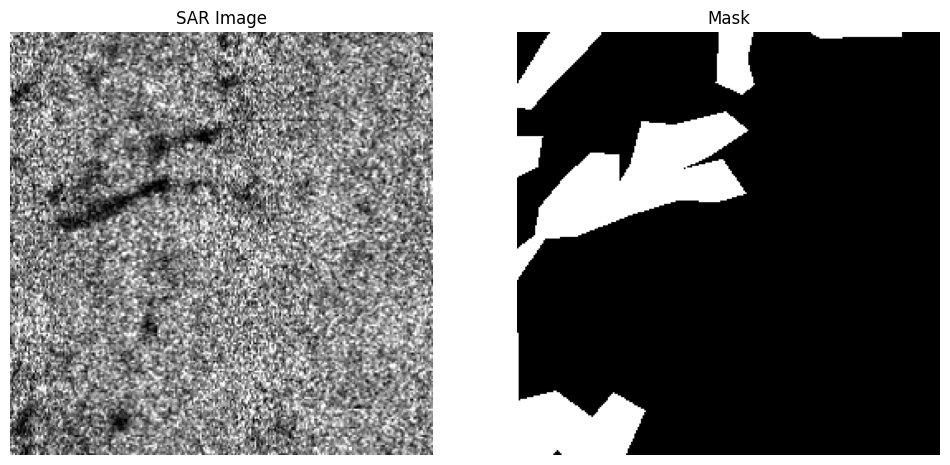

In [166]:
idx = random.randint(0, len(train_images)-1)

img  = cv2.imread(train_images[idx], 0)
mask = cv2.imread(train_masks[idx], 0)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("SAR Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.show()


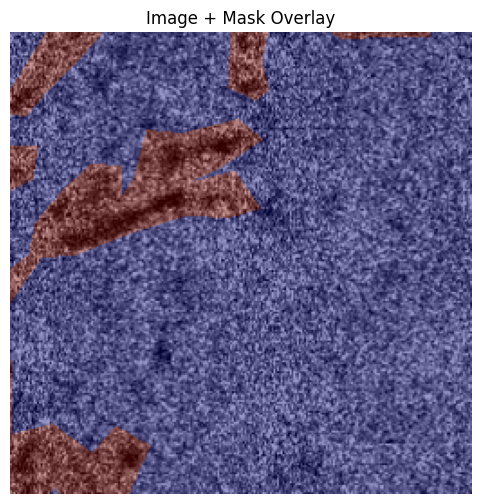

In [167]:
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.imshow(mask, cmap='jet', alpha=0.4)
plt.title("Image + Mask Overlay")
plt.axis('off')
plt.show()


In [168]:
print("Image Min :", img.min())
print("Image Max :", img.max())
print("Image Mean:", img.mean())


Image Min : 0
Image Max : 255
Image Mean: 133.3368682861328


In [169]:
print("Mask unique values:", np.unique(mask))


Mask unique values: [  0 255]


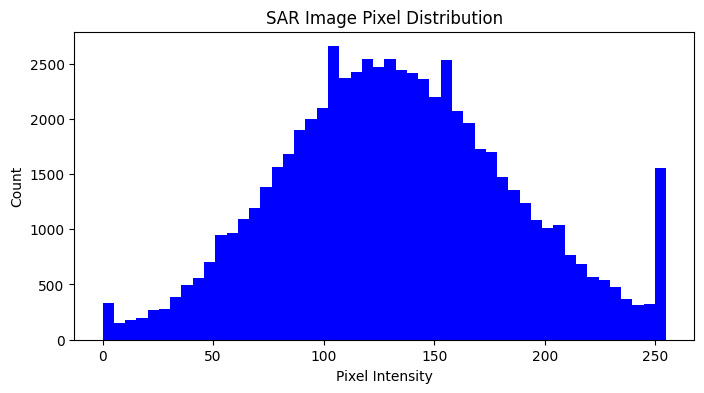

In [170]:
plt.figure(figsize=(8,4))
plt.hist(img.ravel(), bins=50, color='blue')
plt.title("SAR Image Pixel Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()


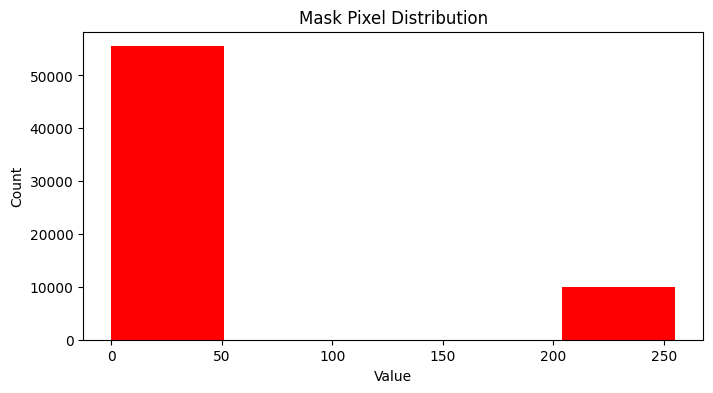

In [171]:
plt.figure(figsize=(8,4))
plt.hist(mask.ravel(), bins=5, color='red')
plt.title("Mask Pixel Distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


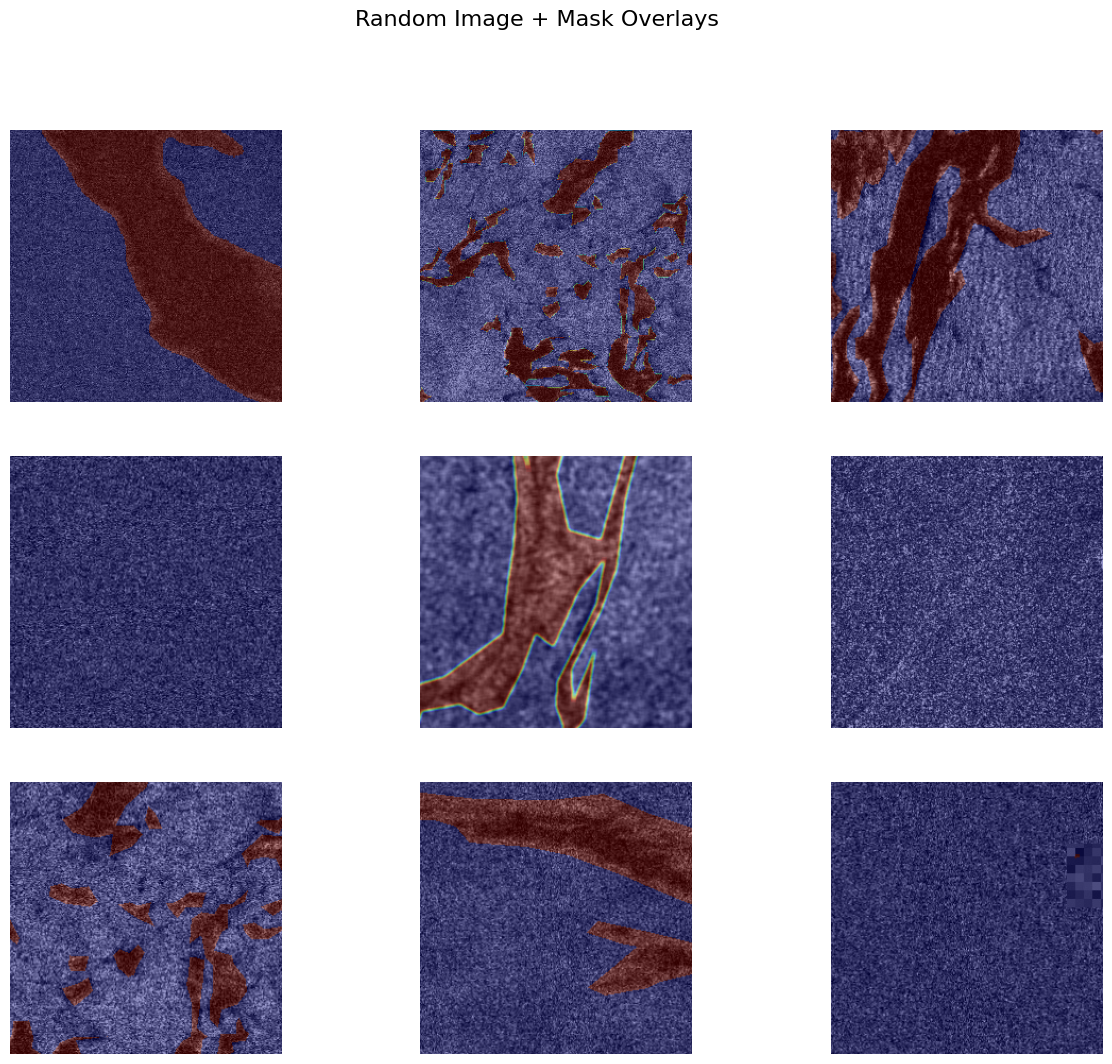

In [172]:
plt.figure(figsize=(15,12))

for i in range(9):
    idx = random.randint(0, len(train_images)-1)

    img  = cv2.imread(train_images[idx], 0)
    mask = cv2.imread(train_masks[idx], 0)

    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.4)
    plt.axis('off')

plt.suptitle("Random Image + Mask Overlays", fontsize=16)
plt.show()


In [173]:
print("Training image shape:", img.shape)


Training image shape: (256, 256)


In [174]:
total_oil_pixels = 0
total_pixels = 0

for m in train_masks:
    mask = cv2.imread(m, 0)
    total_oil_pixels += np.sum(mask > 0)
    total_pixels += mask.size

oil_percentage = (total_oil_pixels / total_pixels) * 100
print(f"Oil Pixel Percentage in Training Masks: {oil_percentage:.4f}%")


Oil Pixel Percentage in Training Masks: 25.6900%


In [175]:
print("Training samples:", len(train_images))
print("Validation samples:", len(val_images))


Training samples: 6455
Validation samples: 1615


In [176]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt


In [177]:
train_images = sorted(glob("/content/dataset/images/train/*.png"))
train_masks  = sorted(glob("/content/dataset/masks/train/*.png"))

print("Loaded", len(train_images), "train images")
print("Loaded", len(train_masks),  "train masks")


Loaded 6455 train images
Loaded 6455 train masks


In [178]:
os.makedirs("/content/processed/train/images", exist_ok=True)
os.makedirs("/content/processed/train/masks", exist_ok=True)

os.makedirs("/content/processed/val/images", exist_ok=True)
os.makedirs("/content/processed/val/masks", exist_ok=True)


In [179]:
IMG_SIZE = 256  # recommended for U-Net

def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # 1. Remove speckle noise (SAR)
    img = cv2.medianBlur(img, 3)

    # 2. Resize
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # 3. Normalize (0-1)
    img = img / 255.0

    return img

def preprocess_mask(path):
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # 1. Resize
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

    # 2. Binarize mask (0 or 1)
    mask = (mask > 0).astype(np.uint8)

    return mask


In [180]:
for img_path, mask_path in zip(train_images, train_masks):
    img = preprocess_image(img_path)
    mask = preprocess_mask(mask_path)

    # save preprocessed outputs
    img_name = os.path.basename(img_path)
    mask_name = os.path.basename(mask_path)

    np.save(f"/content/processed/train/images/{img_name}.npy", img)
    np.save(f"/content/processed/train/masks/{mask_name}.npy", mask)


In [181]:
for img_path, mask_path in zip(val_images, val_masks):
    img = preprocess_image(img_path)
    mask = preprocess_mask(mask_path)

    img_name = os.path.basename(img_path)
    mask_name = os.path.basename(mask_path)

    np.save(f"/content/processed/val/images/{img_name}.npy", img)
    np.save(f"/content/processed/val/masks/{mask_name}.npy", mask)


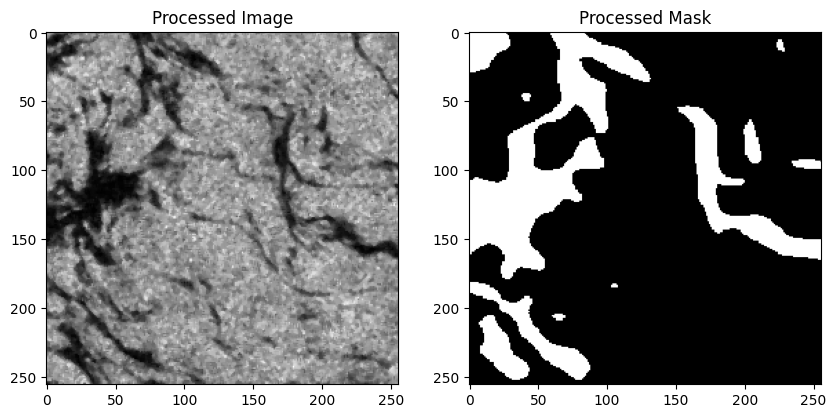

In [182]:
import random

sample = random.choice(glob("/content/processed/train/images/*.npy"))

img = np.load(sample)
mask = np.load(sample.replace("images", "masks"))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Processed Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Processed Mask")

plt.show()
